<p id="eda" style="font-size:30px; text-align:center; font-weight:bold">Generic Pre-processing (Doctor-Patient Dialogues Dataset)</p>

<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 20px">Data pre-processing or preparation in machine learning is the process of getting the raw data cleaned and organise so that it can be used for training and developing machine learning models. It is very useful process in order to utlise computational resources effectively and get better results especially in terms of performance and accuracy of the machine learning models.</p>

<p style="font-size: 20px">Pre-processing datasets, like conversations between doctors and patients, is crucial for enhancing data quality, relevance, and model accuracy. The text must be cleaned up and standardised, tokenized, dealing with stopwords and stemming or lemmatization must be handled. The context must be preserved, textual data must be encoded for machine learning applications, the dataset must be balanced. Proper pre-processing ensures meaningful analysis, especially in sensitive contexts like healthcare. </p>

<p style="font-size: 20px">Text data in NLP (Natural Language Processing) can be divided into many types, each with its own linguistic characteristics, such as posts on social media, literature, academic publications, news, user reviews and conversations. Depending on the type of dataset and machine learning technique, several preprocessing techniques are used, including as tokenization, lowercasing, stopword removal, lemmatization, and handling of URLs, numerals, emojis and much more.For example, in the context of medical dataset information are so important, it is important to retain stopwords during doctor-patient conversations while in text classification, better to remove stopwords.</p>

<p style="font-size: 20px">After getting insights from the data in file <b>"medical_chatbot_data_description_and_EDA"</b>, I get to know that following techniques will be needed to prepare this dataset for machine learning modelling.</p>

<p style="font-size: 20px">
    <ul>
        <li>
            <a style="font-size: 20px" href=""> Remove ID column</a>
        </li>
        <li>
            <a style="font-size: 20px" href=""> Remove Duplicate Dialogues </a>
        </li>
         <li>
             <a style="font-size: 20px" href=""> Convert to Lowercase</a>
        </li>
        <li>
            <a style="font-size: 20px" href="">  Remove Irrelevant Charachters</a>
        </li>
        <li>
            <a style="font-size: 20px" href="">  Handle Contractions</a>
        </li>
        <li>
            <a style="font-size: 20px" href="">  Spell Correction</a>
        </li>
        <li>
            <a style="font-size: 20px" href=""> Handle Stopwords</a>
        </li>
         <li>
             <a style="font-size: 20px" href=""> Handle Lemmitization </a>
        </li>
        <li>
            <a style="font-size: 20px" href="">  Remove Urls </a>
        </li>
        <li>
            <a style="font-size: 20px" href=""> Tokenization </a>
        </li>
    </ul>
</p>

<p style="font-size: 20px">For the medical chatbot applications sequence-to-sequence machine learning models widely used so it also requires specialized steps. Keys steps include tokenization, padding, sequences, embeddings and attenion masks. Let's discuss the pre-processing steps in this file for machine learning models or pre-trained models I have used for this project.</p>

<p><b style="font-size: 20px"><u>LSTM</u></b></p>
<p style="font-size: 20px">When training LSTM models on patient-doctor dialogues, essential pre-processing techniques include:</p>
<p style="font-size: 20px"><b style="font-size: 20px">Tokenization:</b> convert sentences into words.</p>
<p style="font-size: 20px"><b style="font-size: 20px">Padding:</b> Adjust sequences to a fixed length to meet LSTM's consistent input size requirement.</p>
<p style="font-size: 20px"><b style="font-size: 20px">Sliding Window:</b> Convert dialogues into fixed-length sequences.</p>
<p style="font-size: 20px"><b style="font-size: 20px">With Word2Vec embeddings</b></p>
<p style="font-size: 20px">Tokens are transformed into their corresponding vectors.
Words not in the Word2Vec vocabulary are set to zero or random vectors.</p>

<p><b style="font-size: 20px">Without Word2Vec</b></p>
<p style="font-size: 20px">The LSTM model will use an embedding layer.
This layer learns and refines how to represent each word during training.</p>

<p><b style="font-size: 20px"><u>GPT-2 or BART (Transformer based Pre-trained models)</u></b></p>


<p style="font-size: 20px">When fine-tuning models like GPT-2 or BART, essential pre-processing techniques include:</p>
<p style="font-size: 20px"><b style="font-size: 20px">Tokenization:</b>Convert sentences into words.</p>
<p style="font-size: 20px"><b style="font-size: 20px">Special Tokens:</b>Unique markers that the model needs, like start or end indicators.</p>
<p style="font-size: 20px"><b style="font-size: 20px">Attention Masks:</b>Help the model tell the difference between real content and filler.</p>
<p style="font-size: 20px"><b style="font-size: 20px">Segment IDs:</b>Label multiple sequences so the model can tell them apart.</p>
<p style="font-size: 20px"><b style="font-size: 20px">Padding:</b>Make texts in a batch the same length by adding filler.</p>

<div style="width:100%;height:3px; background-color:black"></div>

<p id="lib" style="font-size:30px; text-align:center; font-weight:bold">Required libraries or packages for pre-processing</p> <a href="#top">Back To Top</a>

<div style="width:100%;height:3px; background-color:black"></div>

In [2]:
import pandas as pd # package for data manipulation and analysis
import os # for operating system dependent functionalities like directory paths
import json # package for parsing and handling JSON data

import string # package for string manipulations, including punctuation checks
import re # re for regular expression operations
from textblob import TextBlob # library for processing textual data. I have used this for spelling correction 
import nltk # Natural Language Toolkit package for text processing and analysis
from nltk.corpus import stopwords # package for retrieving common words that are typically removed during text preprocessing
from nltk.probability import FreqDist # package for obtaining the frequency distribution of words
from nltk.tokenize import word_tokenize # method for tokenizing a string into words
import spacy #spacy library for natural language processing
import matplotlib.image as mpimg # image package for image loading and processing
import matplotlib.pyplot as plt # package for plotting and visualizing patient-doctor dialogues dataset


2023-09-06 04:16:16.530172: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-06 04:16:17.025811: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.2/lib64
2023-09-06 04:16:17.025860: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.2/lib64
2023-09-06 04:16:17.025866: W tensorflow/compiler/tf2tensorrt/utils/py_utils

<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px; font-weight: bold">Load Dataset</p>

In [3]:
file_path = 'en_medical_dialog.json' # file name and path string assigned to the file_path variable

In [4]:
with open(file_path, 'r') as file:  # load the json content of the file to json_data variable
    json_data = json.load(file)

<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px; font-weight: bold">Remove Duplicate Dialogues</p>

<p style="font-size: 20px">In order to ensure effective training and avoid overfitting, removing duplicate dialogues from doctor-patient datasets is crucial for the development of medical chatbot. The model's understanding may be biassed as a result of duplicates, which also limits its ability to generalise to new scenarios. </p>

In [5]:
def count_sentence_occurrences(data, sentence_to_check): # function to check the occurrences of each dialogue in the dataset
    count = 0
    for conversation in data: # loop to iterate through each text in the dataset
        description_txt = conversation["Description"]
        doctor_txt = conversation["Doctor"]
        patient_txt = conversation["Patient"]
        
        # icondition to check if the sentence occurs in the description's text
        if sentence_to_check in description_txt:
            count += 1
        
        # condition to check if the sentence occurs in the doctor's text
        if sentence_to_check in doctor_txt:
            count += 1
        
        # condition to check if the sentence occurs in the patient's text
        if sentence_to_check in patient_txt:
            count += 1
    
    return count


In [6]:
sentence_to_check = "What does abutment of the nerve root mean?" # random sentence from the patient-doctor dialogues dataset to check the redundancy

occurrences = count_sentence_occurrences(json_data, sentence_to_check)  # function call to check the number of occurences of the specfic sentence which has been assigned above to the variable sentence_to_check
print(f"The sentence appears {occurrences} times in the data.")

The sentence appears 758 times in the data.


In [7]:
def remove_repetitive_dialogues(data): # function to remove the duplicate dialogues
    unique_dialogues = {} # dictionary to track unique dialogues
    cleaned_data = [] # list to store non-repetitve data
    
    for conversation in data: # loop through each conversation in the data 
        description_txt = conversation["Description"]
        doctor_txt = conversation["Doctor"]
        patient_txt = conversation["Patient"]
        
        # unique key for each dialogue by concatenating doctor and patient text
        dialogue_key = doctor_txt + "|" + patient_txt + "|" + description_txt
        
        # condtion to check if the dialogue is already in the unique_dialogues dictionary
        if dialogue_key not in unique_dialogues:
            unique_dialogues[dialogue_key] = True
            cleaned_data.append(conversation)
    
    return cleaned_data #return cleaned data


In [8]:
cleaned_data = remove_repetitive_dialogues(json_data) # function call to remove duplicate dialogues

<p style="font-size: 20px"><b>Re-check the dataset for duplicates</b></p>

In [9]:
sentence_to_check = "What does abutment of the nerve root mean?"

occurrences = count_sentence_occurrences(cleaned_data, sentence_to_check)
print(f"The sentence appears {occurrences} times in the data.")

The sentence appears 1 times in the data.


<p style="font-size: 20px">From the above output, it can be seen that duplicate dialogues has been removed from the dataset.</p>

<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px; font-weight: bold">Remove ID Column</p>

<p style="font-size: 20px">The "id" column in the dataset is just and identifier of the each dialogue and does not provide any semantic meaning. Moreover, it can introduce the noise without benefiting the performance of the model so better is to remove the "id" column from the dataset.</p>

In [10]:
medicalDialogueDataset = pd.DataFrame(cleaned_data) # convert the data into a pandas DataFrame to perform further pre-processing

In [11]:
medicalDialogueDataset = medicalDialogueDataset.drop("id", axis=1)


In [12]:
medicalDialogueDataset.info() # info() just to check the updated dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247101 entries, 0 to 247100
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Description  247101 non-null  object
 1   Doctor       247101 non-null  object
 2   Patient      247101 non-null  object
dtypes: object(3)
memory usage: 5.7+ MB


<p style="font-size: 20px">From the above dataset information it can be seen that "id" column has been removed from the dataset.</p>

<div style="width:100%;height:1px; background-color:black"></div>

<center ><u style="font-size:23px; text-align:center; font-weight:bold;">Pre-processing Techniques and their Function Definitions</u></center> <a href="#top">Back To Top</a>

<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 20px"><b>Convert to lowercase</b></p>

<p style="font-size: 20px">Converting to the lowercase is a common pre-processing techniques which helps in text normalization, case-insensitive matching and also reduce the dimensionality of machine learning models. The reduction in dimensionality means two same texts will be treated as one e.g, "TEXT" and "text" will be treated as one token, ultimatley results in less use of computational resources and the model will perform better.</p>

In [23]:
def convert_to_lowercase(text): # function definition to convert all the text to lowecase
    
    text = text.lower()
    
    return text

<p style="font-size: 20px"><b>Remove irrelevant charachters</b></p>

<p style="font-size: 20px">Irrelevant charachters in the dataset can introduce inconsistencies, removing them can ensure data cleanliness and consistency which can improve the accuracy of the machine learning model. Moreover, unnecessary charachters can increase the use of computational resources as well.</p>

In [25]:
def remove_irrelevant_characters(text): # function definition to irrelevant charachters from the dataset
    
    pattern = r"[^a-zA-Z0-9\s.,;?!'\"-]" # pattern for characters to be removed plus this pattern keeps letters, numbers, whitespaces, and common punctuation marks like "?"
    
    text = re.sub(pattern, "", text) # function from re package used to replace occurences of a pattern
    return text


<p style="font-size: 20px"><b>Handle Contractions</b></p>

<p style="font-size: 20px">In the EDA part, I have shown you an example of contraction "cant", these type of contractions can cause the data inconsistency, ambiguity, and can reduce model accuracy. Therefore, the following function has been used to replace the contractions to their original form.</p>

In [26]:
def handle_contractions(text): # function definition to handle contractions
    replacements = { # list to replace contractions with their original form
        r'\bu\b': 'you',
        r'\bim\b': 'I am',
        r'\bur\b': 'your',
        r'\burs\b': 'yours',
        r'\bvry\b': 'very',
        r'\babt\b': 'about',
        r'\bdont\b': 'do not',
        r'\bdon\'t\b': 'do not',
        r'\bhavent\b': 'have not',
        r'\bhadnt\b': 'had not',
        r"\bhave'nt\b": 'have not',
        r"\bhaven't\b": 'have not',
        r"\bhadn't\b": 'had not',
        r'\bwont\b': 'will not',
        r'\bwon\'t\b': 'will not',
        r'\bit\'s\b': 'it is',
        r'\bcan\'t\b': 'cannot',
        r'\bcannt\b': 'cannot',
        r'\bisnt\b': 'is not',
        r'\bisn\'t\b': 'is not',
        r'\baren\'t\b': 'are not',
        r'\barent\b': 'are not',
        r'\bwasnt\b': 'was not',
        r'\bwasn\'t\b': 'was not',
        r'\bweren\'t\b': 'were not',
        r'\bwerent\b': 'were not',
        r'\bive\b': 'I have',
        r'\bi\'ve\b': 'I have',
        r'\bit\'ll\b': 'it will',
        r'\bi\'ll\b': 'I will',
        r'\byou\'re\b': 'you are',
        r'\byoure\b': 'you are',
        r'\bwe\'re\b': 'we are',
        r'\bthey\'re\b': 'they are',
        r'\bthere\'s\b': 'there is',
        r'\bthat\'s\b': 'that is',
        r'\bshould\'ve\b': 'should have',
        r'\bshouldve\b': 'should have',
        r'\bcnt\b': 'cannot',
        r'\bcant\b': 'cannot',
        r'\bwe\'ve\b': 'we have',
        r'\bthey\'ve\b': 'they have',
        r'\bwhat\'s\b': 'what is',
        r'\bwho\'s\b': 'who is',
        r'\bwho\'ve\b': 'who have',
        r'\byou\'ve\b': 'you have',
        r'\bcouldn\'t\b': 'could not',
        r'\bshouldn\'t\b': 'should not',
        r'\bwouldn\'t\b': 'would not',
        r'\bmightn\'t\b': 'might not',
        r'\bit\'d\b': 'it would',
        r'\bi\'d\b': 'I would',
        r'\bhe\'s\b': 'he is',
        r'\bshe\'s\b': 'she is',
        r'\bthat\'ll\b': 'that will',
        r'\bthere\'ll\b': 'there will',
        r'\bwhere\'s\b': 'where is',
        r'\bhow\'s\b': 'how is',
        r'\bwhat\'re\b': 'what are',
        r'\bhow\'re\b': 'how are',
        r'\bwhy\'s\b': 'why is',
        r'\bya\b': 'you',
        r'\byou\'d\b': 'you would',
        r'\bcould\'ve\b': 'could have',
        r'\bwould\'ve\b': 'would have',
        r'\by\'all\b': 'you all',
        r'\bgonna\b': 'going to',
        r'\bwanna\b': 'want to',
        r'\bgotta\b': 'got to',
        r'\bdunno\b': 'do not know',
        r'\blemme\b': 'let me',
        r'\bbtw\b': 'by the way',
        r'\blol\b': 'laugh out loud',
        r'\btbh\b': 'to be honest',
        r'\bfyi\b': 'for your information',
        r'\bbrb\b': 'be right back',
        r'\bbff\b': 'best friends forever',
        r'\bomg\b': 'oh my god',
        r'\bttyl\b': 'talk to you later',
        r'\bpls\b|plz': 'please',
        r'\bthx\b|ty': 'thank you',
        r'\bain\'t\b': 'is not',
        r'\bfam\b': 'family',
        r'\bidk\b': 'I do not know',
        r'\bimo\b': 'in my opinion',
        r'\bsmh\b': 'shaking my head',
        r'\bffs\b': 'for god sake',
        r'\bftw\b': 'for the win',
        r'\bikr\b': 'I know right',
        r'\birl\b': 'in real life',
        r'\bnvm\b': 'never mind',
        r'\bobv\b': 'obviously',
        r'\brofl\b': 'rolling on the floor laughing',
        r'\bstfu\b': 'shut the [explicit] up',
        r'\btmi\b': 'too much information',
        r'\btbh\b': 'to be honest',
        r'\btl;dr\b': 'too long; didn\'t read',
        r'\btq\b': 'thank you',
        r'\bwth\b': 'what the hell',
        r'\bymmv\b': 'your mileage may vary',
        r'\bafaik\b': 'as far as I know',
        r'\batm\b': 'at the moment',
        r'\bb4\b': 'before',
        r'\bcya\b': 'see you',
        r'\bfwiw\b': 'for what it\'s worth',
        r'\bhmu\b': 'hit me up',
        r'\bimo\b': 'in my opinion',
        r'\bimho\b': 'in my humble opinion',
        r'\biow\b': 'in other words',
        r'\bl8r\b': 'later',
        r'\bm8\b': 'mate',
        r'\bnsfw\b': 'not safe for work',
        r'\botw\b': 'on the way',
        r'\brip\b': 'rest in peace',
        r'\brsvp\b': 'please reply',
        r'\btyt\b': 'take your time',
        r'\bw\/o\b': 'without',
        r'\bw\/\b': 'with',
        r'\byolo\b': 'you only live once'
    }

    for pattern, replacement in replacements.items(): # loop through each replacement
        text = re.sub(pattern, replacement, text, flags=re.IGNORECASE)
 # re.sub() to search for the pattern in the text and replace it with the specifc replacement. flags=re.IGNORECASE; set the props to ignore case
    return text


<p style="font-size: 20px"><b>Spell Correction</b></p>

<p style="font-size: 20px">Incorrect spellings can results in data inconsistency and misinterpretation of the model. In the context of medical chatbot it is mandatory to generate appropriate responses from the system. Therefore, following function has been used to correct the spellings in the dataset.</p>

In [28]:
def correct_spelling(text): # function definition to correct spellings if there will be any incorrect spelling in the text
    blob = TextBlob(text)
    corrected_text = blob.correct()
    # 'correct' method/function of textblob package to correct the spelling mistakes in the text
    return str(corrected_text) # convert textblob back to string and than returning string

<p style="font-size: 20px"><b>Remove URLs</b></p>

<p style="font-size: 20px">In the medical chatbot dialogue system, URLs are often removed in order to maintain the data's cleanliness and the model's focus on the semantic content of the dialogue because URL's do not carry semantic meaning related to the medical content. The presence of URL's can introduce the noise, therefore, better is to remove the URLs. Following function has been used to remove the URLs from the dataset.</p>

In [34]:
def remove_urls(text): # function definition to remove URLs
    
    url_pattern = re.compile(r'https?://\S+|www\.\S+|\S+\.com\S*') # regular expression pattern to capture most URLs
    return url_pattern.sub(r'', text) # sub() function to remove URLs


<p style="font-size: 20px"><b>Handling Stopwords</b></p>

<p style="font-size: 20px">Removing stopwords could result in the loss of some contextual meaning, particularly in a dataset of doctor-patient dialogue format where each word could sentiment or crucial information. However, it can consume a lot of computational resources as the dataset have <b>19128860</b> stopwords but retaining the seniment is more important. Therefore, it has been decided not to remove the stop words from the dataset.</p>

<p style="font-size: 20px"><b>Handling Lemmitization</b></p>

<p style="font-size: 20px">Lemmatization is the process in NLP (Natural Language Processing) in which words are converted to their root form, e.g "going" to "go" , "is" "am" "are" to "be". Lemmatization can help in reducing the dimensionality of the data by converting words to their base form and can be computationaly effective. The usage of lemmatization depends upon the type of problem, dataset and selection of machine learning model. It might result in loss of context, especially in a medical chatbot and the type of dataset (conversational; doctor-patient dialogues) we are preparing.</p>

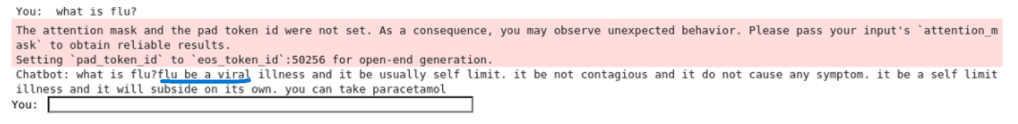

In [18]:
img = mpimg.imread('screenshots/with_lemmitization.png') # function used to read the image from the screenshots directory
plt.figure(figsize=(18,12))  # size of the image
plt.imshow(img) # matplotlib imshow() method to show the image
plt.axis('off')  # Hide axes
plt.show()

<p style="font-size: 20px">  I have trained one model with lemmatization while inferencing some grammatical incorrectness has been seen. Lemmatization has also resulted in loss of tense and tone. Therefore, for training the machine learning models lemmatization has not been considered in pre-processing. Moreover, neural architectures (sequence to sequence) has been implemented in the development of medical chatbot which can handles the context and can often handle various forms of a word.</p>

<div style="width:100%;height:1px; background-color:black"></div>

<center ><u style="font-size:23px; text-align:center; font-weight:bold;">Function Call to apply all the pre-processing tehcniques on the dataset</u></center> <a href="#top">Back To Top</a>

<div style="width:100%;height:1px; background-color:black"></div>

In [35]:
def preprocess_text(text): # function definition to call other pre-processing functions
    
    processed_text = convert_to_lowercase(text) # function call to convert text to lowercase
    
    processed_text = remove_irrelevant_characters(processed_text) # function call to remove irrelevant characters
    
    processed_text = handle_contractions(processed_text) # function call to handle contractions
    
    processed_text = remove_urls(processed_text) # function call to remove URLs
   
    # processed_text = correct_spelling(processed_text) # function call for the spelling correction

    return processed_text  # returning the cleaned or processed data from where it being called

In [37]:
cleanedMedicalDialogueDataset = pd.DataFrame() # creating new dataframe to store the cleaned or processed columns

In [38]:
cleanedMedicalDialogueDataset['Description'] = medicalDialogueDataset['Description'].apply(preprocess_text) # apply pre-process techniques on the description column and storing it to the "Description" column of new dataFrame

In [39]:
cleanedMedicalDialogueDataset['Doctor'] = medicalDialogueDataset['Doctor'].apply(preprocess_text) # apply pre-process techniques on the doctor column and storing it to the "Doctor" column of new dataFrame

In [40]:
cleanedMedicalDialogueDataset['Patient'] = medicalDialogueDataset['Patient'].apply(preprocess_text) # apply pre-process techniques on the patient column and storing it to the "Patient" column of new dataFrame

<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 20px"><b>Save the cleaned dataset in to JSON format</b></p>

In [41]:
# Sample data for demonstration

# Select the three columns you want to convert to JSON format
selected_columns = cleanedMedicalDialogueDataset[['Description', 'Doctor', 'Patient']]

# Convert the selected columns to a list of dictionaries with 'records' orientation
records = selected_columns.to_dict(orient='records')

# Define the output file name
output_file = os.path.join('cleaned_medical_dialogues_dataset.json')

# Write the JSON data to the file in a pretty format with 4 spaces indentation
with open(output_file, 'w') as f:
    json.dump(records, f, indent=4)

# Display the saved file path
print(f"JSON data saved to: {output_file}")


JSON data saved to: cleaned_medical_dialogues_dataset.json


In [42]:
output_file

'cleaned_medical_dialogues_dataset.json'

<p style="font-size: 20px">Different problems or dataset has different pre-processing techniques and machine learning modelling. For the development of medical chatbot it is important to select the appropriate machine learning or deep learning model or any pre-trained model. As every model has different type of input shapes I will do the remaining pre-processing techniques according to their need in thier respective python file.</p>